In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.data.data_loader import load_all_data

df = load_all_data()

In [11]:
import numpy as np
X = np.stack(df["g_ave_reps"])

In [36]:
import hdbscan
from joblib import Memory

cachedir = 'cache'
memory = Memory(cachedir, verbose=0)

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True, memory=memory, core_dist_n_jobs=10)
cluster_labels = clusterer.fit(X[1:5000])

In [37]:
labels = clusterer.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 28
Estimated number of noise points: 3950


In [38]:
dir(clusterer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_finite',
 '_check_feature_names',
 '_check_n_features',
 '_condensed_tree',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_metric_kwargs',
 '_min_spanning_tree',
 '_more_tags',
 '_outlier_scores',
 '_prediction_data',
 '_raw_data',
 '_relative_validity',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_single_linkage_tree',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'allow_single_cluster',
 'alpha',
 'approx_min_span_tree',
 'cluster_persistence_',
 'cluster_selection_epsilon',
 'cluster_selection_method',
 'condensed_tree_',
 'core_dist_n_jobs',


/Users/andrestorhaug/Code/Projects/code-comment-prompt-engineering/.venv/lib/python3.9/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<AxesSubplot: ylabel='$\\lambda$ value'>

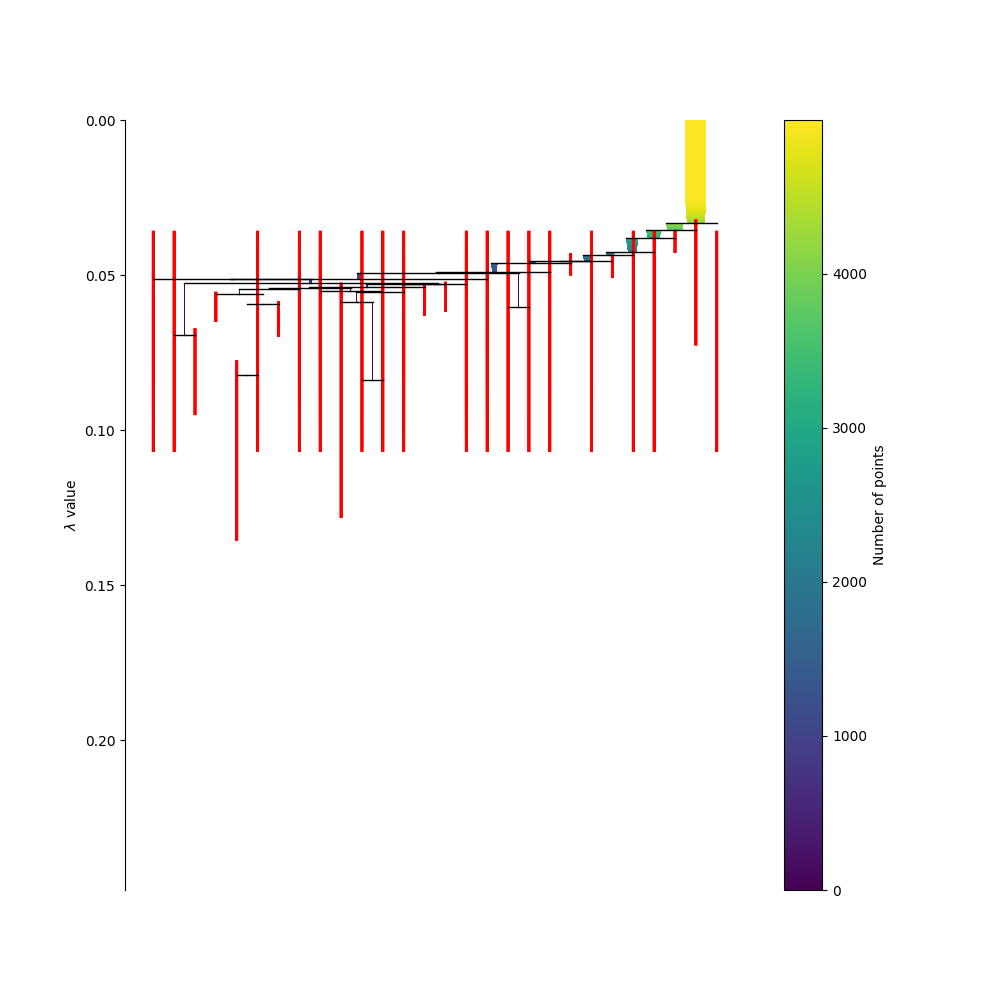

In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 10))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 20))

In [35]:
g = clusterer.condensed_tree_.to_networkx()
g.number_of_nodes()

10548

In [17]:
tree = clusterer.condensed_tree_.to_pandas()
tree.head()

,parent,child,lambda_val,child_size
0,99,88,0.020694,1
1,99,15,0.024683,1
2,99,72,0.026089,1
3,99,73,0.026467,1
4,99,85,0.026568,1


In [18]:
clusterer.condensed_tree_.to_numpy()

array([(99, 88, 0.02069408, 1), (99, 15, 0.02468282, 1),
       (99, 72, 0.02608927, 1), (99, 73, 0.02646678, 1),
       (99, 85, 0.02656809, 1), (99, 66, 0.02741489, 1),
       (99, 10, 0.02750801, 1), (99, 94, 0.02753733, 1),
       (99, 20, 0.02784898, 1), (99,  6, 0.02813717, 1),
       (99,  0, 0.02845203, 1), (99, 71, 0.02857006, 1),
       (99, 95, 0.02863922, 1), (99, 29, 0.02872496, 1),
       (99, 41, 0.02911628, 1), (99, 30, 0.02943576, 1),
       (99, 14, 0.02964821, 1), (99, 82, 0.02983145, 1),
       (99, 19, 0.02996736, 1), (99, 83, 0.03063395, 1),
       (99, 48, 0.03075449, 1), (99, 28, 0.03077124, 1),
       (99, 55, 0.03118903, 1), (99, 86, 0.03129723, 1),
       (99, 36, 0.03160818, 1), (99, 43, 0.03216816, 1),
       (99,  8, 0.03249848, 1), (99,  3, 0.03291526, 1),
       (99, 26, 0.03296329, 1), (99, 27, 0.03296654, 1),
       (99, 75, 0.03297862, 1), (99, 23, 0.03300508, 1),
       (99, 79, 0.03321769, 1), (99, 65, 0.03372631, 1),
       (99,  4, 0.03373995, 1),

<AxesSubplot: ylabel='distance'>

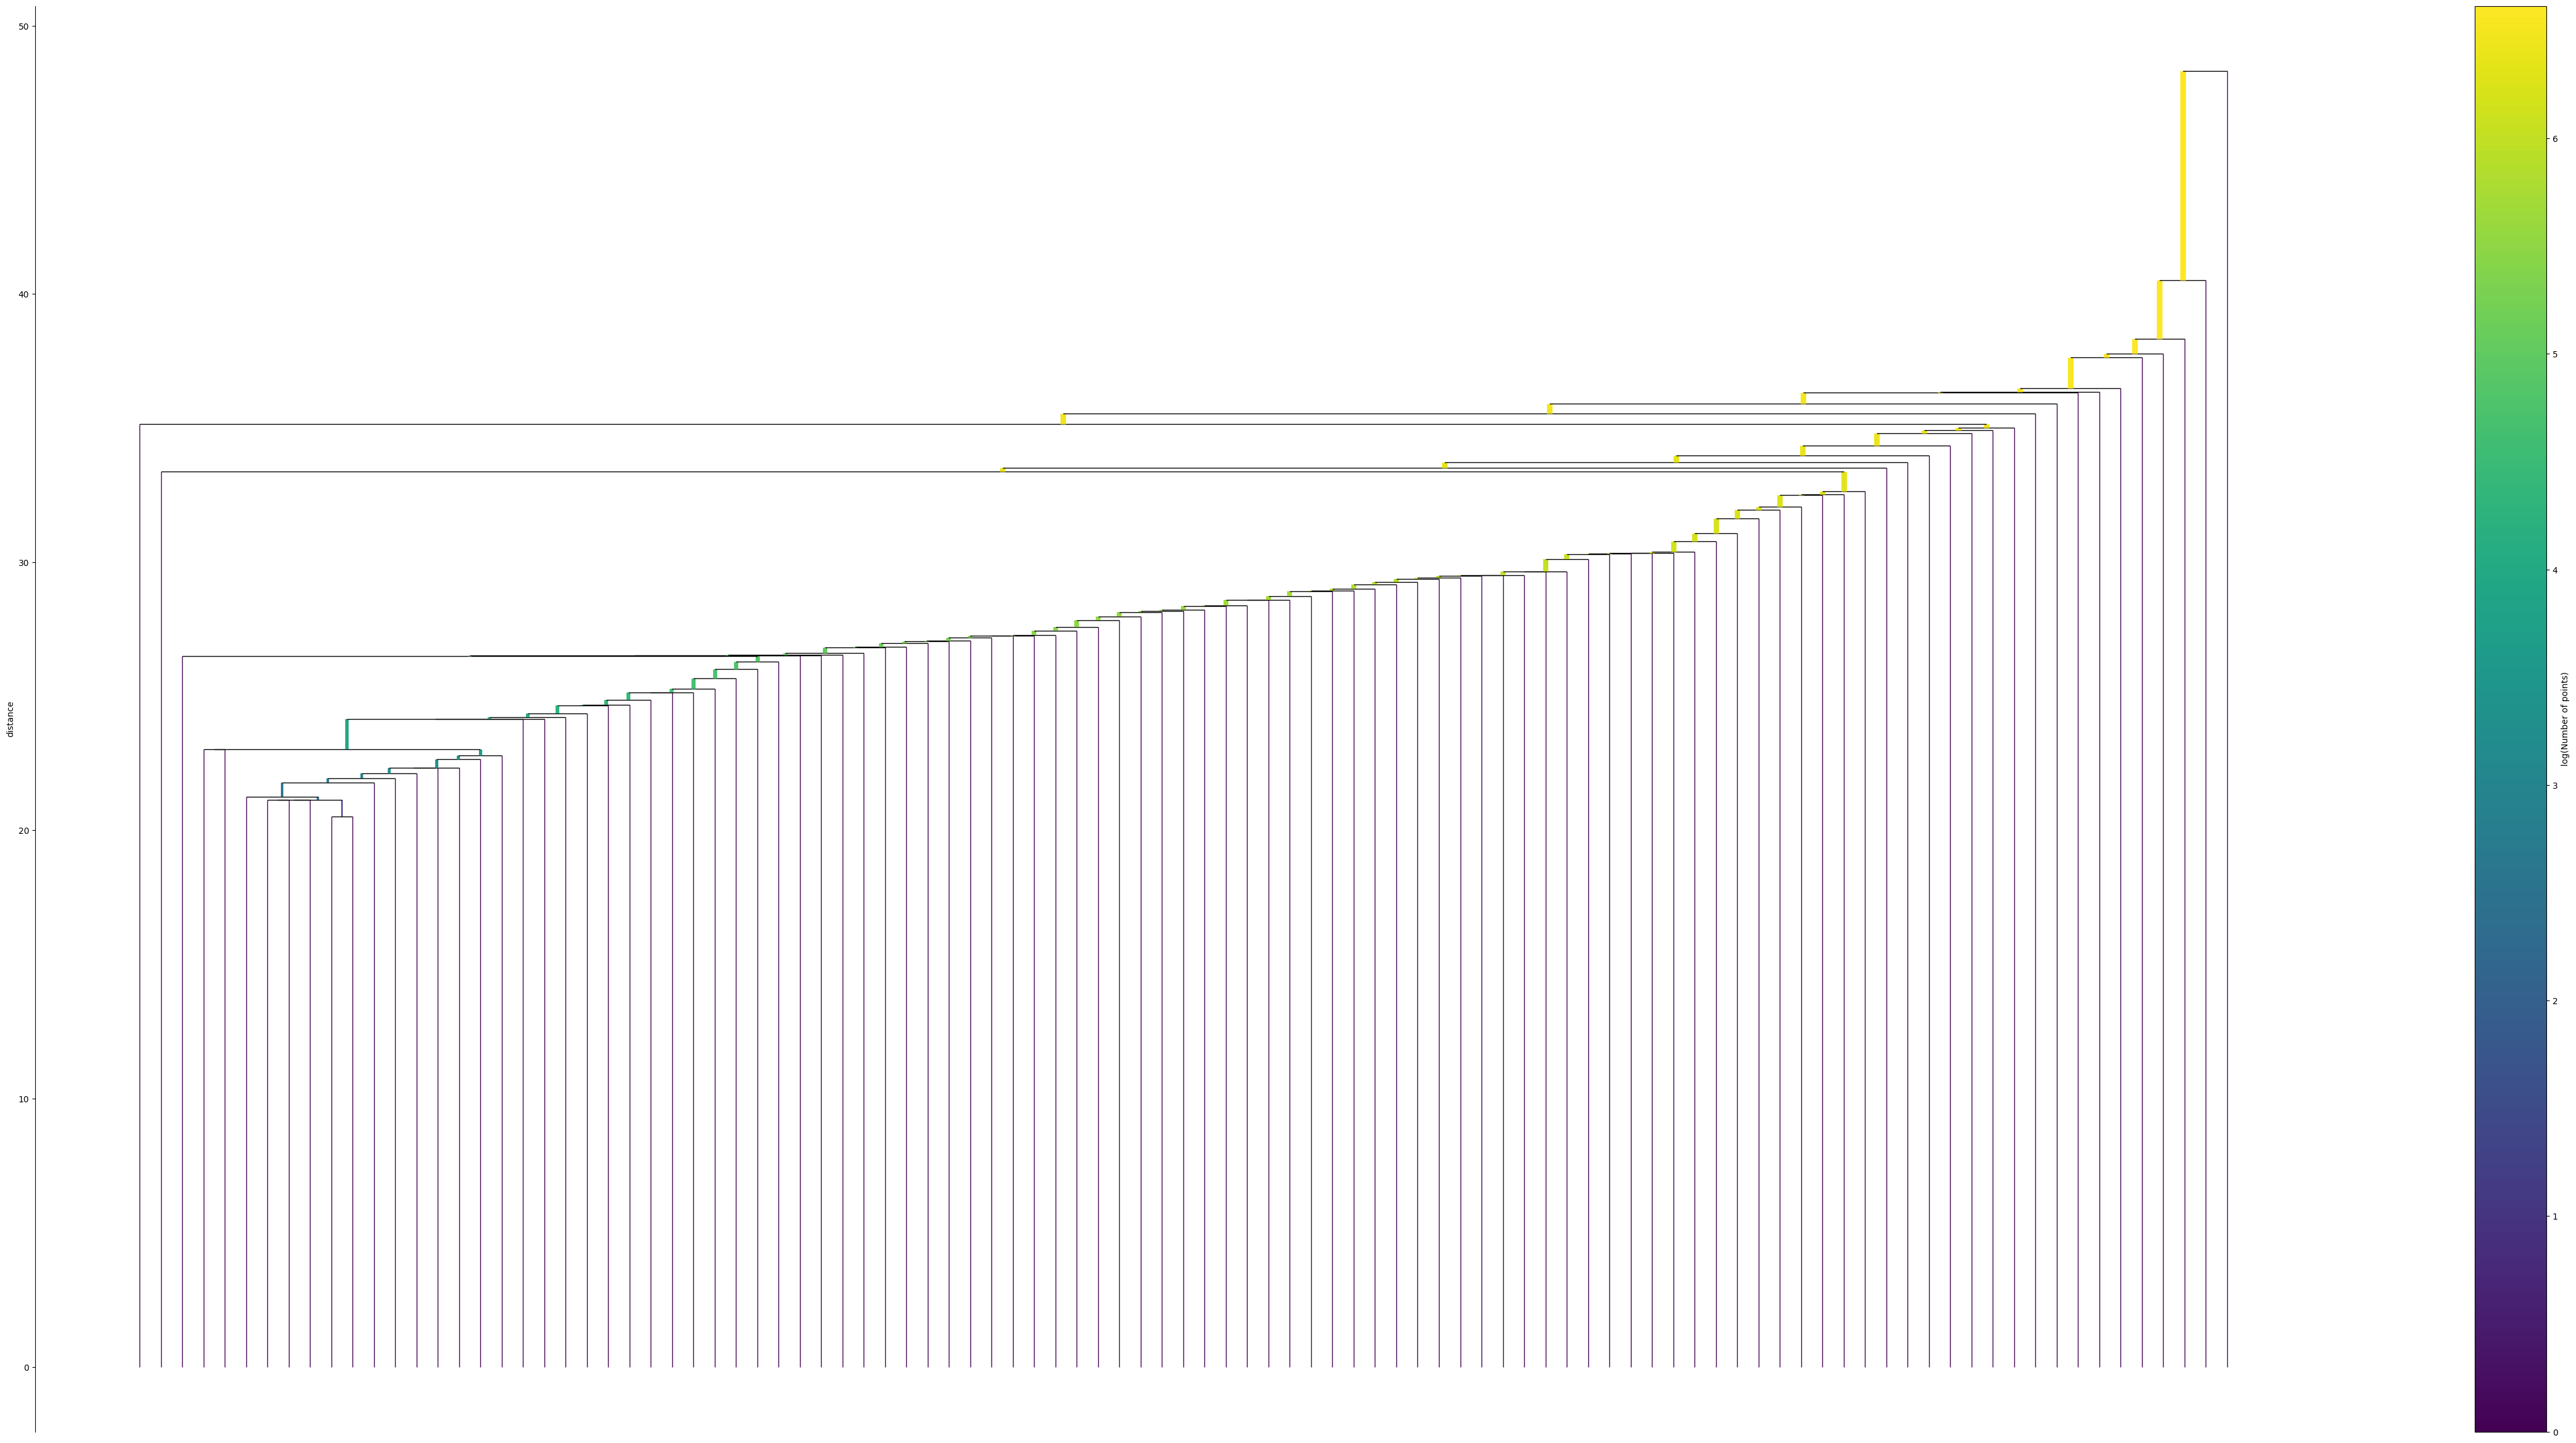

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60, 30))

clusterer.single_linkage_tree_.plot()

In [21]:
slt =  clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=10)
print(list(slt))

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
